In [2]:
import csv
import numpy as np
from datetime import datetime
from collections import defaultdict
import matplotlib.pyplot as plt

In [3]:
first = False
dates = []
with open('data/crimes.csv', 'r') as csvfile:
    crimes_reader = csv.reader(csvfile)
    for row in crimes_reader:
        if not first:
            first = True
            continue
        try:
            dates.append(row[2])
        except:
            # continue?
            raise

In [4]:
date_objects = []
for strdate in dates:
    date_objects.append(datetime.strptime(strdate, '%m/%d/%Y %I:%M:%S %p'))

In [5]:
now = datetime.now()
d = date_objects[0]
d.weekday()

6

Plot the number of crimes per weekday

In [6]:
weekday_crimes = defaultdict(lambda:0)
for d in date_objects:
    weekday_crimes[d.weekday()] += 1
weekday_crime_count = []
for j in range(0,7):
    weekday_crime_count.append(weekday_crimes[j])


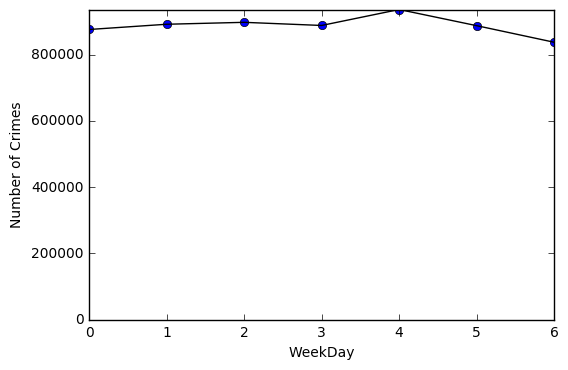

In [7]:
plt.xlabel('WeekDay')
plt.ylabel('Number of Crimes')
plt.plot(weekday_crime_count,'bo',weekday_crime_count, 'k')
plt.axis([0, 6, 0, max(weekday_crime_count)])
plt.show()

In [8]:

month_crimes = defaultdict(lambda:0)
for d in date_objects:
    month_crimes[d.month] += 1
s_m_c = []
for m in range(1,13):
    s_m_c.append(month_crimes[m])

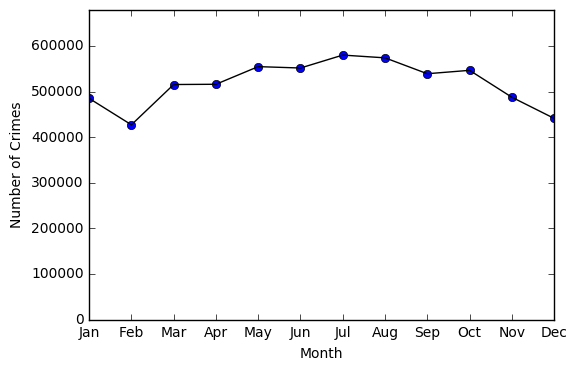

In [38]:
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.plot(s_m_c,'bo',s_m_c, 'k')
plt.axis([0, 11, 0, max(s_m_c)+100000])
xlabels = [datetime(1900, monthinteger, 1).strftime('%b') for monthinteger in range(1,13)]
plt.xticks(range(0,12), xlabels)
plt.show()

In [10]:
days_crimes = defaultdict(lambda:0)
for d in date_objects:
    days_crimes[d.timetuple().tm_yday] += 1
days_cc = []
total = len(days_crimes)
for j in range(0, total):
    days_cc.append(days_crimes[j])


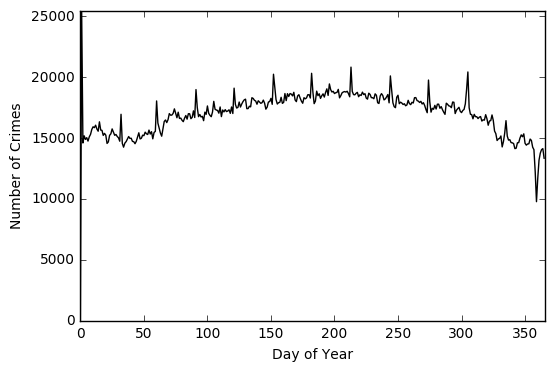

In [11]:
plt.xlabel('Day of Year')
plt.ylabel('Number of Crimes')
plt.plot(range(0, total),days_cc, 'k')
plt.axis([0, total, 0, max(days_cc)])
plt.show()

In [12]:
weekly_crimes = defaultdict(lambda:0)
for d in date_objects:
    weekly_crimes[int(d.day / 7)] += 1
weekly_cc = []
for w in range(0, 5):
    weekly_cc.append(weekly_crimes[w])

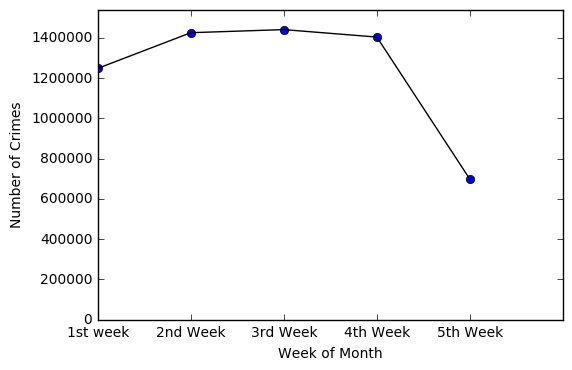

In [29]:
plt.xlabel('Week of Month')
plt.ylabel('Number of Crimes')
plt.plot(weekly_cc,'bo',weekly_cc, 'k')
plt.axis([0, 5, 0, max(weekly_cc)+100000])
xlabels = ["1st week", "2nd Week", "3rd Week", "4th Week", "5th Week"]
plt.xticks(range(0,5), xlabels)
plt.show()

In [19]:
hourly_crimes = defaultdict(lambda:0)
for d in date_objects:
    hourly_crimes[int(d.hour / 3)] += 1
hourly_cc = []
for w in range(0, 8):
    hourly_cc.append(hourly_crimes[w])

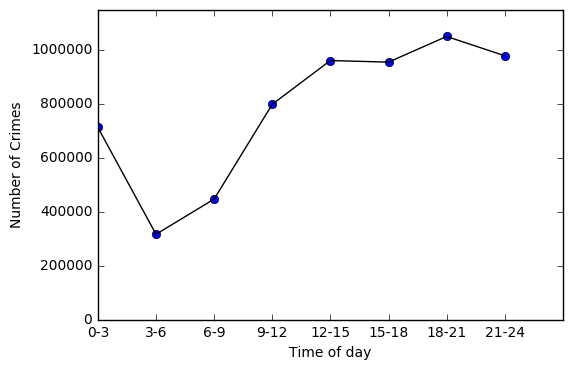

In [25]:
plt.xlabel('Time of day')
plt.ylabel('Number of Crimes')
plt.plot(hourly_cc,'bo',hourly_cc, 'k')
plt.axis([0, 8, 0, max(hourly_cc)+100000])
xlabels = ["{}-{}".format((x-1)*3, x*3) for x in range(1,9)]
plt.xticks(range(0,8), xlabels)
plt.show()